In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("crunchbase git/crunchbase.csv")
df

,Company,URL,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Country,Industry
0,ByteDance,https://www.crunchbase.com/organization/bytedance,14.0,2.0,59.0,9.405000e+09,13.0,29.0,China,"Content, Data Mining, Internet, Social Media"
1,SpaceX,https://www.crunchbase.com/organization/space-...,1.0,NaN,NaN,9.911791e+09,11.0,81.0,United States,"Advanced Materials, Aerospace, Manufacturing, ..."
2,SHEIN,https://www.crunchbase.com/organization/shein-...,1.0,NaN,NaN,2.053427e+09,4.0,6.0,China,"E-Commerce, Fashion, Marketplace, Textiles"
3,Stripe,https://www.crunchbase.com/organization/stripe,13.0,1.0,59.0,2.235000e+09,14.0,51.0,United States,"Finance, FinTech, Mobile Payments, SaaS"
4,Canva,https://www.crunchbase.com/organization/canva,6.0,NaN,2.0,5.725550e+08,8.0,35.0,Australia,"Graphic Design, Photo Editing, Publishing, Sof..."
...,...,...,...,...,...,...,...,...,...,...
1196,Zhaogang,https://www.crunchbase.com/organization/zhaogang,NaN,NaN,3.0,3.793575e+08,7.0,15.0,China,"Advanced Materials, Industrial Manufacturing, ..."
1197,Zhuan Zhuan,https://www.crunchbase.com/organization/zhuan-...,2.0,NaN,1.0,9.900000e+08,3.0,7.0,China,"Consumer, Consumer Goods, E-Commerce, Marketplace"
1198,Zihaiguo,https://www.crunchbase.com/organization/zihaiguo,NaN,NaN,NaN,7.955631e+07,4.0,5.0,China,"Food and Beverage, Food Processing"
1199,Zopa,https://www.crunchbase.com/organization/zopa,1.0,NaN,NaN,8.861061e+08,11.0,24.0,United Kingdom,"Credit Cards, Financial Services, FinTech, Len..."


In [3]:
df1 = pd.read_csv("unicorn_aug.csv")
df1 = df1.drop(["Unnamed: 0"], axis=1)
df1

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,urlsub,ceo,education
0,ByteDance,$140.00,4/7/17,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",bytedance,Zhang Yiming,1
1,SpaceX,$127.00,12/1/12,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",spacex,Elon Musk,1
2,SHEIN,$100.00,7/3/18,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",shein,Chris Xu,1
3,Stripe,$95.00,1/23/14,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",stripe,Patrick Collison,2
4,Canva,$40.00,1/8/18,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",canva,Melanie Perkins,1
...,...,...,...,...,...,...,...,...,...,...
1200,Zhaogang,$1.00,6/29/17,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",zhaogang,Wei Zhang,0
1201,Zhuan Zhuan,$1.00,4/18/17,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",zhuan zhuan,Haiyang Wang,0
1202,Zihaiguo,$1.00,5/6/21,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",zihaiguo,Hongliang Cai,3
1203,Zopa,$1.00,10/19/21,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",zopa,Jaidev Janardana,0


In [4]:
df1["Valuation ($B)"] = df1['Valuation ($B)'].str.replace('$', '').astype(float)
df1

C:\Users\jim13\AppData\Local\Temp\ipykernel_2188\4217100200.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1["Valuation ($B)"] = df1['Valuation ($B)'].str.replace('$', '').astype(float)


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,urlsub,ceo,education
0,ByteDance,140.0,4/7/17,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",bytedance,Zhang Yiming,1
1,SpaceX,127.0,12/1/12,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",spacex,Elon Musk,1
2,SHEIN,100.0,7/3/18,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",shein,Chris Xu,1
3,Stripe,95.0,1/23/14,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",stripe,Patrick Collison,2
4,Canva,40.0,1/8/18,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",canva,Melanie Perkins,1
...,...,...,...,...,...,...,...,...,...,...
1200,Zhaogang,1.0,6/29/17,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",zhaogang,Wei Zhang,0
1201,Zhuan Zhuan,1.0,4/18/17,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",zhuan zhuan,Haiyang Wang,0
1202,Zihaiguo,1.0,5/6/21,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",zihaiguo,Hongliang Cai,3
1203,Zopa,1.0,10/19/21,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",zopa,Jaidev Janardana,0


In [5]:
# convert to number of seconds after 1970/1/1

df1['Date Joined'] = pd.to_datetime(df1['Date Joined'], format='%m/%d/%y').apply(lambda x: pd.Timestamp(x).timestamp())
df1

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,urlsub,ceo,education
0,ByteDance,140.0,1.491523e+09,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",bytedance,Zhang Yiming,1
1,SpaceX,127.0,1.354320e+09,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",spacex,Elon Musk,1
2,SHEIN,100.0,1.530576e+09,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",shein,Chris Xu,1
3,Stripe,95.0,1.390435e+09,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",stripe,Patrick Collison,2
4,Canva,40.0,1.515370e+09,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",canva,Melanie Perkins,1
...,...,...,...,...,...,...,...,...,...,...
1200,Zhaogang,1.0,1.498694e+09,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",zhaogang,Wei Zhang,0
1201,Zhuan Zhuan,1.0,1.492474e+09,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",zhuan zhuan,Haiyang Wang,0
1202,Zihaiguo,1.0,1.620259e+09,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",zihaiguo,Hongliang Cai,3
1203,Zopa,1.0,1.634602e+09,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",zopa,Jaidev Janardana,0


In [6]:
merged_df = pd.merge(df, df1, on='Company')
merged_df

,Company,URL,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Country_x,Industry_x,Valuation ($B),Date Joined,Country_y,City,Industry_y,Select Investors,urlsub,ceo,education
0,ByteDance,https://www.crunchbase.com/organization/bytedance,14.0,2.0,59.0,9.405000e+09,13.0,29.0,China,"Content, Data Mining, Internet, Social Media",140.0,1.491523e+09,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",bytedance,Zhang Yiming,1
1,SpaceX,https://www.crunchbase.com/organization/space-...,1.0,NaN,NaN,9.911791e+09,11.0,81.0,United States,"Advanced Materials, Aerospace, Manufacturing, ...",127.0,1.354320e+09,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",spacex,Elon Musk,1
2,SHEIN,https://www.crunchbase.com/organization/shein-...,1.0,NaN,NaN,2.053427e+09,4.0,6.0,China,"E-Commerce, Fashion, Marketplace, Textiles",100.0,1.530576e+09,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",shein,Chris Xu,1
3,Stripe,https://www.crunchbase.com/organization/stripe,13.0,1.0,59.0,2.235000e+09,14.0,51.0,United States,"Finance, FinTech, Mobile Payments, SaaS",95.0,1.390435e+09,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",stripe,Patrick Collison,2
4,Canva,https://www.crunchbase.com/organization/canva,6.0,NaN,2.0,5.725550e+08,8.0,35.0,Australia,"Graphic Design, Photo Editing, Publishing, Sof...",40.0,1.515370e+09,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",canva,Melanie Perkins,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,Zhaogang,https://www.crunchbase.com/organization/zhaogang,NaN,NaN,3.0,3.793575e+08,7.0,15.0,China,"Advanced Materials, Industrial Manufacturing, ...",1.0,1.498694e+09,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",zhaogang,Wei Zhang,0
1200,Zhuan Zhuan,https://www.crunchbase.com/organization/zhuan-...,2.0,NaN,1.0,9.900000e+08,3.0,7.0,China,"Consumer, Consumer Goods, E-Commerce, Marketplace",1.0,1.492474e+09,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",zhuan zhuan,Haiyang Wang,0
1201,Zihaiguo,https://www.crunchbase.com/organization/zihaiguo,NaN,NaN,NaN,7.955631e+07,4.0,5.0,China,"Food and Beverage, Food Processing",1.0,1.620259e+09,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",zihaiguo,Hongliang Cai,3
1202,Zopa,https://www.crunchbase.com/organization/zopa,1.0,NaN,NaN,8.861061e+08,11.0,24.0,United Kingdom,"Credit Cards, Financial Services, FinTech, Len...",1.0,1.634602e+09,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",zopa,Jaidev Janardana,0


In [7]:
merged_df = merged_df.drop(["URL","Country_x","Industry_x","urlsub"],axis=1)
merged_df

,Company,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Valuation ($B),Date Joined,Country_y,City,Industry_y,Select Investors,ceo,education
0,ByteDance,14.0,2.0,59.0,9.405000e+09,13.0,29.0,140.0,1.491523e+09,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Zhang Yiming,1
1,SpaceX,1.0,NaN,NaN,9.911791e+09,11.0,81.0,127.0,1.354320e+09,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Elon Musk,1
2,SHEIN,1.0,NaN,NaN,2.053427e+09,4.0,6.0,100.0,1.530576e+09,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Chris Xu,1
3,Stripe,13.0,1.0,59.0,2.235000e+09,14.0,51.0,95.0,1.390435e+09,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",Patrick Collison,2
4,Canva,6.0,NaN,2.0,5.725550e+08,8.0,35.0,40.0,1.515370e+09,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Melanie Perkins,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,Zhaogang,NaN,NaN,3.0,3.793575e+08,7.0,15.0,1.0,1.498694e+09,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",Wei Zhang,0
1200,Zhuan Zhuan,2.0,NaN,1.0,9.900000e+08,3.0,7.0,1.0,1.492474e+09,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",Haiyang Wang,0
1201,Zihaiguo,NaN,NaN,NaN,7.955631e+07,4.0,5.0,1.0,1.620259e+09,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",Hongliang Cai,3
1202,Zopa,1.0,NaN,NaN,8.861061e+08,11.0,24.0,1.0,1.634602e+09,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",Jaidev Janardana,0


In [8]:
merged_df = merged_df.dropna(subset=['Total Funding Amount'])
merged_df['Acquisitions'] = merged_df["Acquisitions"].fillna(0)
merged_df['Exits'] = merged_df['Exits'].fillna(0)
merged_df['Investments'] = merged_df['Investments'].fillna(0)
merged_df

C:\Users\jim13\AppData\Local\Temp\ipykernel_2188\3689415919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Acquisitions'] = merged_df["Acquisitions"].fillna(0)
C:\Users\jim13\AppData\Local\Temp\ipykernel_2188\3689415919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Exits'] = merged_df['Exits'].fillna(0)
C:\Users\jim13\AppData\Local\Temp\ipykernel_2188\3689415919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Company,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Valuation ($B),Date Joined,Country_y,City,Industry_y,Select Investors,ceo,education
0,ByteDance,14.0,2.0,59.0,9.405000e+09,13.0,29.0,140.0,1.491523e+09,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Zhang Yiming,1
1,SpaceX,1.0,0.0,0.0,9.911791e+09,11.0,81.0,127.0,1.354320e+09,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Elon Musk,1
2,SHEIN,1.0,0.0,0.0,2.053427e+09,4.0,6.0,100.0,1.530576e+09,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Chris Xu,1
3,Stripe,13.0,1.0,59.0,2.235000e+09,14.0,51.0,95.0,1.390435e+09,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",Patrick Collison,2
4,Canva,6.0,0.0,2.0,5.725550e+08,8.0,35.0,40.0,1.515370e+09,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Melanie Perkins,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,Zhaogang,0.0,0.0,3.0,3.793575e+08,7.0,15.0,1.0,1.498694e+09,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",Wei Zhang,0
1200,Zhuan Zhuan,2.0,0.0,1.0,9.900000e+08,3.0,7.0,1.0,1.492474e+09,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",Haiyang Wang,0
1201,Zihaiguo,0.0,0.0,0.0,7.955631e+07,4.0,5.0,1.0,1.620259e+09,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",Hongliang Cai,3
1202,Zopa,1.0,0.0,0.0,8.861061e+08,11.0,24.0,1.0,1.634602e+09,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",Jaidev Janardana,0


In [9]:
merged_df = merged_df.dropna()

In [10]:
Xc1 = pd.get_dummies(merged_df["Country_y"]) #clean data using dummies/one hot encoder
Xc2 = pd.get_dummies(merged_df["Industry_y"])
Xc3 = pd.get_dummies(merged_df["City"])
y = merged_df["Valuation ($B)"]

In [11]:
merged_df['Select Investors'] = merged_df['Select Investors'].fillna('')
investor = merged_df['Select Investors'].apply(lambda x: x.split(', '))
investor

C:\Users\jim13\AppData\Local\Temp\ipykernel_2188\2229460768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Select Investors'] = merged_df['Select Investors'].fillna('')


0       [Sequoia Capital China, SIG Asia Investments, ...
1       [Founders Fund, Draper Fisher Jurvetson, Rothe...
2       [Tiger Global Management, Sequoia Capital Chin...
3           [Khosla Ventures, LowercaseCapital, capitalG]
4       [Sequoia Capital China, Blackbird Ventures, Ma...
                              ...                        
1199    [K2 Ventures, Matrix Partners China, IDG Capital]
1200                           [58.com, Tencent Holdings]
1201    [Xingwang Investment Management, China Capital...
1202    [IAG Capital Partners, Augmentum Fintech, Nort...
1203    [Novator Partners, True, Causeway Media Partners]
Name: Select Investors, Length: 1063, dtype: object

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer
# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit the MultiLabelBinarizer to the data and transform the data
investor_matrix = mlb.fit_transform(investor)

# Create a new DataFrame with the transformed data
investor_df = pd.DataFrame(investor_matrix, columns=mlb.classes_)

In [13]:
investor_df

,.406 Ventures,01 Advisors,01 Advisors. Kleiner Perkins Caufield & Byers. Andreessen Horowitz,10T Fund,14W,1955 Capital,360 Capital Partners,3G Capital Management,3L,3i Group,...,frst,iFLYTEK,iFly,iNovia Capital,iSeed Ventures,iTech Capital,iVision Ventures,index Ventures,next47,s28 Capital
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
merged_df.columns

Index(['Company', 'Acquisitions', 'Exits', 'Investments',
       'Total Funding Amount', 'Number of Lead Investors',
       'Number of Investors', 'Valuation ($B)', 'Date Joined', 'Country_y',
       'City', 'Industry_y', 'Select Investors', 'ceo', 'education'],
      dtype='object')

In [176]:
dftry = merged_df.copy().reset_index(drop=True)
dftry

,Company,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Valuation ($B),Date Joined,Country_y,City,Industry_y,Select Investors,ceo,education
0,ByteDance,14.0,2.0,59.0,9.405000e+09,13.0,29.0,140.0,1.491523e+09,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Zhang Yiming,1
1,SpaceX,1.0,0.0,0.0,9.911791e+09,11.0,81.0,127.0,1.354320e+09,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Elon Musk,1
2,SHEIN,1.0,0.0,0.0,2.053427e+09,4.0,6.0,100.0,1.530576e+09,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Chris Xu,1
3,Stripe,13.0,1.0,59.0,2.235000e+09,14.0,51.0,95.0,1.390435e+09,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",Patrick Collison,2
4,Canva,6.0,0.0,2.0,5.725550e+08,8.0,35.0,40.0,1.515370e+09,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Melanie Perkins,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,Zhaogang,0.0,0.0,3.0,3.793575e+08,7.0,15.0,1.0,1.498694e+09,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",Wei Zhang,0
1059,Zhuan Zhuan,2.0,0.0,1.0,9.900000e+08,3.0,7.0,1.0,1.492474e+09,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",Haiyang Wang,0
1060,Zihaiguo,0.0,0.0,0.0,7.955631e+07,4.0,5.0,1.0,1.620259e+09,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",Hongliang Cai,3
1061,Zopa,1.0,0.0,0.0,8.861061e+08,11.0,24.0,1.0,1.634602e+09,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",Jaidev Janardana,0


In [15]:
X = pd.concat([merged_df.drop(["Company", "Valuation ($B)", 'Country_y',
       'City', 'Industry_y', 'Select Investors',"ceo"],axis=1).reset_index(drop=True), Xc1.reset_index(drop=True),
               Xc2.reset_index(drop=True),Xc3.reset_index(drop=True),investor_df.reset_index(drop=True)], axis=1)
X

,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Date Joined,education,Argentina,Australia,...,frst,iFLYTEK,iFly,iNovia Capital,iSeed Ventures,iTech Capital,iVision Ventures,index Ventures,next47,s28 Capital
0,14.0,2.0,59.0,9.405000e+09,13.0,29.0,1.491523e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,0.0,9.911791e+09,11.0,81.0,1.354320e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,0.0,2.053427e+09,4.0,6.0,1.530576e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.0,1.0,59.0,2.235000e+09,14.0,51.0,1.390435e+09,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,0.0,2.0,5.725550e+08,8.0,35.0,1.515370e+09,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,0.0,0.0,3.0,3.793575e+08,7.0,15.0,1.498694e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1059,2.0,0.0,1.0,9.900000e+08,3.0,7.0,1.492474e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1060,0.0,0.0,0.0,7.955631e+07,4.0,5.0,1.620259e+09,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1061,1.0,0.0,0.0,8.861061e+08,11.0,24.0,1.634602e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6, test_size = 0.25) 
# optional arg. stratify returns training and test subsets that have the same proportions of class labels as the input dataset

X_train

,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Date Joined,education,Argentina,Australia,...,frst,iFLYTEK,iFly,iNovia Capital,iSeed Ventures,iTech Capital,iVision Ventures,index Ventures,next47,s28 Capital
407,0.0,0.0,0.0,5.933832e+08,8.0,17.0,1.624234e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
374,4.0,0.0,0.0,4.829839e+08,5.0,11.0,1.622506e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
864,0.0,0.0,0.0,1.800000e+08,1.0,6.0,1.654646e+09,3,0,0,...,0,0,0,0,0,0,0,0,0,0
362,0.0,0.0,4.0,1.564037e+09,7.0,35.0,1.588291e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
942,0.0,0.0,0.0,2.626439e+08,7.0,13.0,1.638922e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,1.0,0.0,0.0,4.960000e+08,7.0,16.0,1.614730e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
618,2.0,0.0,0.0,5.113619e+08,6.0,15.0,1.537402e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227,2.0,1.0,7.0,9.037966e+08,4.0,8.0,1.633997e+09,2,0,0,...,0,0,0,0,0,0,0,0,0,0
713,1.0,0.0,0.0,1.911000e+08,5.0,31.0,1.658362e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
y_train

434     2.10
400     2.35
968     1.00
387     2.41
1062    1.00
        ... 
355     2.60
679     1.50
243     3.50
791     1.25
1019    1.00
Name: Valuation ($B), Length: 797, dtype: float64

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [92]:
rf = RandomForestRegressor(n_estimators=300, random_state=0)

# Train the model on the training data
rf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model using R-squared (R^2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE score: {mse}")


R-squared score: 0.2517710196796398
MSE score: 90.46023181634503


### Hyperparameter Tuning

In [117]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [118]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor(random_state = 0)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [119]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [120]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [80,110],
    'max_features': ['sqrt', 1],
    'min_samples_leaf': [1,2],
    'min_samples_split': [2, 3],
    'n_estimators': [300, 200]
}
# Create a based model
rf = RandomForestRegressor(random_state=0)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [80, 110],
                         'max_features': ['sqrt', 1],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [300, 200]},
             verbose=2)

In [121]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [135]:
grid_search.best_score_

0.26029909110574645

In [136]:
rf = RandomForestRegressor(n_estimators=300,
 min_samples_split= 2,
 min_samples_leaf =2,
 max_features ='sqrt',
 max_depth =80,
 bootstrap =False, random_state=0)
rf.fit(X_train, y_train)

t_pred = rf.predict(X_train)
r2t = r2_score(y_train, t_pred)
print(f"Training R-squared score: {r2t}")

y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE score: {mse}")

Training R-squared score: 0.6894967594679776
R-squared score: 0.16765032783839262
MSE score: 100.63035016868744


In [138]:
rf = RandomForestRegressor(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)

t_pred = rf.predict(X_train)
r2t = r2_score(y_train, t_pred)
print(f"Training R-squared score: {r2t}")

y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE score: {mse}")

Training R-squared score: 0.8773188280193562
R-squared score: 0.22885813841267144
MSE score: 93.23037919837093


In [143]:
mean_y_train = y_train.mean()
naive_predictions = [mean_y_train] * len(y_test)
baseline_mse = mean_squared_error(y_test, naive_predictions)

print("Baseline MSE using naive mean prediction:", baseline_mse)

Baseline MSE using naive mean prediction: 121.42531760430765


In [179]:
from sklearn.model_selection import KFold

# Add a column to store the predicted values
dftry['predicted_value'] = 0

# Set up the k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Loop through the folds
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    print(f'Fold {fold + 1}')

    # Split the data into training and testing sets
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test = X.iloc[test_idx]

    # Fit the random forest regressor on the training set
    model = RandomForestRegressor(n_estimators=300, random_state=0)
    model.fit(X_train, y_train)

    # Predict the target variable for the test set
    y_pred = model.predict(X_test)

    # Store the predicted values in the DataFrame for this fold
    dftry.loc[test_idx, 'predicted_value'] = y_pred


# Print the first few rows of the updated dataframe
print(dftry.head())

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
     Company  Acquisitions  Exits  Investments  Total Funding Amount  \
0  ByteDance          14.0    2.0         59.0          9.405000e+09   
1     SpaceX           1.0    0.0          0.0          9.911791e+09   
2      SHEIN           1.0    0.0          0.0          2.053427e+09   
3     Stripe          13.0    1.0         59.0          2.235000e+09   
4      Canva           6.0    0.0          2.0          5.725550e+08   

   Number of Lead Investors  Number of Investors  Valuation ($B)  \
0                      13.0                 29.0           140.0   
1                      11.0                 81.0           127.0   
2                       4.0                  6.0           100.0   
3                      14.0                 51.0            95.0   
4                       8.0                 35.0            40.0   

    Date Joined      Country_y           City  \
0  1.491523e+09          China        Beijing   
1  1.354320e+09  United S

In [166]:
y_pred

array([33.2387,  2.6153,  9.6146,  3.4898,  3.4025,  2.4952,  8.2919,
        2.849 , 13.5943,  8.5365, 10.4738,  2.7581,  4.2246, 12.3438,
        7.8948, 36.884 ,  5.7487, 11.9573,  5.5213,  5.293 ,  9.6108,
        2.9737,  4.4459,  3.513 ,  3.3664,  5.6597,  3.263 ,  4.9708,
        3.8045,  3.5343,  4.2255,  2.8773,  2.7038,  4.2406,  1.4429,
        2.5818,  4.904 ,  6.7196,  2.8783,  9.3413,  4.4968,  1.8222,
        5.0126,  1.2556,  2.3611,  4.9767,  4.6219,  1.5219,  2.244 ,
        5.1911,  2.7001,  4.9083,  2.0932,  3.4931,  3.1073,  2.803 ,
        5.3978,  3.0127,  3.1349,  2.7664,  2.7317,  1.5019,  1.7247,
        3.0237,  2.2384,  2.9234,  2.6054,  1.373 ,  2.8408,  1.4743,
        2.0266,  1.8518,  2.3718,  1.2781,  2.7611,  2.9293,  1.3236,
        1.5885,  1.576 ,  1.4467,  1.8661, 18.5863,  2.1354,  1.7732,
        1.5811,  1.6994,  2.6407,  1.7348,  2.3015,  5.3441,  1.689 ,
        1.7129,  2.6495,  2.6488,  1.3078,  1.5496,  1.4593,  2.6078,
        2.0274,  1.9

In [174]:
dftry["predicted_value"]

0       20.8882
1       33.2387
2        6.5320
3       16.9089
4        2.6153
         ...   
1196     0.0000
1197     0.0000
1198     0.0000
1199     0.0000
1200     0.0000
Name: predicted_value, Length: 1201, dtype: float64

In [180]:
dftry

,Company,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Valuation ($B),Date Joined,Country_y,City,Industry_y,Select Investors,ceo,education,predicted_value
0,ByteDance,14.0,2.0,59.0,9.405000e+09,13.0,29.0,140.0,1.491523e+09,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",Zhang Yiming,1,24.310200
1,SpaceX,1.0,0.0,0.0,9.911791e+09,11.0,81.0,127.0,1.354320e+09,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Elon Musk,1,32.747100
2,SHEIN,1.0,0.0,0.0,2.053427e+09,4.0,6.0,100.0,1.530576e+09,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",Chris Xu,1,4.658967
3,Stripe,13.0,1.0,59.0,2.235000e+09,14.0,51.0,95.0,1.390435e+09,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",Patrick Collison,2,17.780767
4,Canva,6.0,0.0,2.0,5.725550e+08,8.0,35.0,40.0,1.515370e+09,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",Melanie Perkins,1,3.229967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,Zhaogang,0.0,0.0,3.0,3.793575e+08,7.0,15.0,1.0,1.498694e+09,China,Shanghai,E-commerce & direct-to-consumer,"K2 Ventures, Matrix Partners China, IDG Capital",Wei Zhang,0,1.670833
1059,Zhuan Zhuan,2.0,0.0,1.0,9.900000e+08,3.0,7.0,1.0,1.492474e+09,China,Beijing,E-commerce & direct-to-consumer,"58.com, Tencent Holdings",Haiyang Wang,0,3.993700
1060,Zihaiguo,0.0,0.0,0.0,7.955631e+07,4.0,5.0,1.0,1.620259e+09,China,Chongqing,Consumer & retail,"Xingwang Investment Management, China Capital ...",Hongliang Cai,3,1.134067
1061,Zopa,1.0,0.0,0.0,8.861061e+08,11.0,24.0,1.0,1.634602e+09,United Kingdom,London,Fintech,"IAG Capital Partners, Augmentum Fintech, North...",Jaidev Janardana,0,2.443667


In [181]:
dftry["Country"] = dftry["Country_y"]
dftry["Industry"] = dftry["Industry_y"]
dftry = dftry.drop(["Country_y","Industry_y"],axis=1)
dftry

,Company,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Valuation ($B),Date Joined,City,Select Investors,ceo,education,predicted_value,Country,Industry
0,ByteDance,14.0,2.0,59.0,9.405000e+09,13.0,29.0,140.0,1.491523e+09,Beijing,"Sequoia Capital China, SIG Asia Investments, S...",Zhang Yiming,1,24.310200,China,Artificial intelligence
1,SpaceX,1.0,0.0,0.0,9.911791e+09,11.0,81.0,127.0,1.354320e+09,Hawthorne,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Elon Musk,1,32.747100,United States,Other
2,SHEIN,1.0,0.0,0.0,2.053427e+09,4.0,6.0,100.0,1.530576e+09,Shenzhen,"Tiger Global Management, Sequoia Capital China...",Chris Xu,1,4.658967,China,E-commerce & direct-to-consumer
3,Stripe,13.0,1.0,59.0,2.235000e+09,14.0,51.0,95.0,1.390435e+09,San Francisco,"Khosla Ventures, LowercaseCapital, capitalG",Patrick Collison,2,17.780767,United States,Fintech
4,Canva,6.0,0.0,2.0,5.725550e+08,8.0,35.0,40.0,1.515370e+09,Surry Hills,"Sequoia Capital China, Blackbird Ventures, Mat...",Melanie Perkins,1,3.229967,Australia,Internet software & services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,Zhaogang,0.0,0.0,3.0,3.793575e+08,7.0,15.0,1.0,1.498694e+09,Shanghai,"K2 Ventures, Matrix Partners China, IDG Capital",Wei Zhang,0,1.670833,China,E-commerce & direct-to-consumer
1059,Zhuan Zhuan,2.0,0.0,1.0,9.900000e+08,3.0,7.0,1.0,1.492474e+09,Beijing,"58.com, Tencent Holdings",Haiyang Wang,0,3.993700,China,E-commerce & direct-to-consumer
1060,Zihaiguo,0.0,0.0,0.0,7.955631e+07,4.0,5.0,1.0,1.620259e+09,Chongqing,"Xingwang Investment Management, China Capital ...",Hongliang Cai,3,1.134067,China,Consumer & retail
1061,Zopa,1.0,0.0,0.0,8.861061e+08,11.0,24.0,1.0,1.634602e+09,London,"IAG Capital Partners, Augmentum Fintech, North...",Jaidev Janardana,0,2.443667,United Kingdom,Fintech


In [ ]:
dftry.to_

### Feature effects/importances

In [139]:
import pandas as pd

importances = rf.feature_importances_
feature_names = [X_test.columns[i] for i in range(X.shape[1])]
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.DataFrame({"feature":feature_names, "importances": importances})

forest_importances = forest_importances.sort_values(by = "importances", ascending=False)
forest_importances

,feature,importances
3,Total Funding Amount,0.209224
106,LowercaseCapital,0.197153
74,Draper Fisher Jurvetson,0.129280
115,Rothenberg Ventures,0.113796
35,Hawthorne,0.044855
...,...,...
99,Kalaari Capital,0.000154
112,RRE Ventures,0.000146
117,Sequoia Capital China,0.000135
137,Venrock,0.000107


In [90]:
X = X.drop(forest_importances[-700:]["feature"],axis=1)
X

,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Date Joined,education,Argentina,Australia,...,and Sequoia Capital China,capitalG,e.ventures,eWTP Capital,enaya Capital,frst,iFly,index Ventures,next47,s28 Capital
0,14.0,2.0,59.0,9.405000e+09,13.0,29.0,1.491523e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,0.0,9.911791e+09,11.0,81.0,1.354320e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,0.0,2.053427e+09,4.0,6.0,1.530576e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.0,1.0,59.0,2.235000e+09,14.0,51.0,1.390435e+09,2,0,0,...,0,1,0,0,0,0,0,0,0,0
4,6.0,0.0,2.0,5.725550e+08,8.0,35.0,1.515370e+09,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,0.0,0.0,3.0,3.793575e+08,7.0,15.0,1.498694e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1059,2.0,0.0,1.0,9.900000e+08,3.0,7.0,1.492474e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1060,0.0,0.0,0.0,7.955631e+07,4.0,5.0,1.620259e+09,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1061,1.0,0.0,0.0,8.861061e+08,11.0,24.0,1.634602e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6, test_size = 0.25) 
# optional arg. stratify returns training and test subsets that have the same proportions of class labels as the input dataset

X_train

,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Date Joined,education,Argentina,Australia,...,and Sequoia Capital China,capitalG,e.ventures,eWTP Capital,enaya Capital,frst,iFly,index Ventures,next47,s28 Capital
407,0.0,0.0,0.0,5.933832e+08,8.0,17.0,1.624234e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
374,4.0,0.0,0.0,4.829839e+08,5.0,11.0,1.622506e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
864,0.0,0.0,0.0,1.800000e+08,1.0,6.0,1.654646e+09,3,0,0,...,0,0,0,0,0,0,0,0,0,0
362,0.0,0.0,4.0,1.564037e+09,7.0,35.0,1.588291e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
942,0.0,0.0,0.0,2.626439e+08,7.0,13.0,1.638922e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,1.0,0.0,0.0,4.960000e+08,7.0,16.0,1.614730e+09,0,0,0,...,0,0,0,0,1,0,0,0,0,0
618,2.0,0.0,0.0,5.113619e+08,6.0,15.0,1.537402e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227,2.0,1.0,7.0,9.037966e+08,4.0,8.0,1.633997e+09,2,0,0,...,0,0,0,0,0,0,0,0,0,0
713,1.0,0.0,0.0,1.911000e+08,5.0,31.0,1.658362e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
importances = rf.feature_importances_
feature_names = [X_test.columns[i] for i in range(X.shape[1])]
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.DataFrame({"feature":feature_names, "importances": importances})

forest_importances = forest_importances.sort_values(by = "importances", ascending=False)
forest_importances

,feature,importances
3,Total Funding Amount,2.127099e-01
596,LowercaseCapital,1.818084e-01
404,Draper Fisher Jurvetson,1.240296e-01
716,Rothenberg Ventures,1.199471e-01
2,Investments,5.931703e-02
...,...,...
545,JAFCO,1.373226e-07
103,Eden Prairie,1.120675e-07
725,SCB 10X,6.973450e-08
325,Brookfield Asset Management,6.844123e-08


In [96]:
forest_importances[-700:]

,feature,importances
169,Redwood City,6.467606e-05
42,Turkey,6.456801e-05
77,Brussels,6.437945e-05
255,Alven Capital,6.427241e-05
505,Hellman & Friedman,6.416356e-05
...,...,...
545,JAFCO,1.373226e-07
103,Eden Prairie,1.120675e-07
725,SCB 10X,6.973450e-08
325,Brookfield Asset Management,6.844123e-08


In [97]:
X = X.drop(forest_importances[-700:]["feature"],axis=1)
X

,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Date Joined,education,China,France,...,Valar Ventures,Venrock,Venture51,Vickers Venture Partners,Warbug Pincus,Y Combinator,Yunfeng Capital,Zeev Ventures,capitalG,index Ventures
0,14.0,2.0,59.0,9.405000e+09,13.0,29.0,1.491523e+09,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,0.0,9.911791e+09,11.0,81.0,1.354320e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,0.0,2.053427e+09,4.0,6.0,1.530576e+09,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,13.0,1.0,59.0,2.235000e+09,14.0,51.0,1.390435e+09,2,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6.0,0.0,2.0,5.725550e+08,8.0,35.0,1.515370e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,0.0,0.0,3.0,3.793575e+08,7.0,15.0,1.498694e+09,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1059,2.0,0.0,1.0,9.900000e+08,3.0,7.0,1.492474e+09,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1060,0.0,0.0,0.0,7.955631e+07,4.0,5.0,1.620259e+09,3,1,0,...,0,0,0,0,0,0,0,0,0,0
1061,1.0,0.0,0.0,8.861061e+08,11.0,24.0,1.634602e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6, test_size = 0.25) 
# optional arg. stratify returns training and test subsets that have the same proportions of class labels as the input dataset

X_train

,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Date Joined,education,China,France,...,Valar Ventures,Venrock,Venture51,Vickers Venture Partners,Warbug Pincus,Y Combinator,Yunfeng Capital,Zeev Ventures,capitalG,index Ventures
407,0.0,0.0,0.0,5.933832e+08,8.0,17.0,1.624234e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
374,4.0,0.0,0.0,4.829839e+08,5.0,11.0,1.622506e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
864,0.0,0.0,0.0,1.800000e+08,1.0,6.0,1.654646e+09,3,0,0,...,0,0,0,0,0,0,0,0,0,0
362,0.0,0.0,4.0,1.564037e+09,7.0,35.0,1.588291e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
942,0.0,0.0,0.0,2.626439e+08,7.0,13.0,1.638922e+09,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,1.0,0.0,0.0,4.960000e+08,7.0,16.0,1.614730e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
618,2.0,0.0,0.0,5.113619e+08,6.0,15.0,1.537402e+09,0,1,0,...,0,0,0,0,0,0,0,0,0,0
227,2.0,1.0,7.0,9.037966e+08,4.0,8.0,1.633997e+09,2,0,0,...,0,0,0,0,0,0,0,0,0,0
713,1.0,0.0,0.0,1.911000e+08,5.0,31.0,1.658362e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
forest_importances[-50:]

,feature,importances
149,Nortzone Ventures,0.000141
105,Formation 8,0.000140
147,Nor-Cal Invest,0.000139
78,Anthos Capital,0.000139
107,Founders Fund,0.000138
161,Salesforce Ventures,0.000138
106,Founder Collective,0.000138
72,Activant Capital,0.000136
151,Pantera Capital,0.000136
62,Suzhou,0.000133


In [114]:
X = X.drop(forest_importances[-50:]["feature"],axis=1)
X

,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Date Joined,education,China,France,...,VY Capital,Valar Ventures,Venrock,Venture51,Vickers Venture Partners,Warbug Pincus,Y Combinator,Yunfeng Capital,capitalG,index Ventures
0,14.0,2.0,59.0,9.405000e+09,13.0,29.0,1.491523e+09,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,0.0,9.911791e+09,11.0,81.0,1.354320e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,0.0,2.053427e+09,4.0,6.0,1.530576e+09,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,13.0,1.0,59.0,2.235000e+09,14.0,51.0,1.390435e+09,2,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6.0,0.0,2.0,5.725550e+08,8.0,35.0,1.515370e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,0.0,0.0,3.0,3.793575e+08,7.0,15.0,1.498694e+09,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1059,2.0,0.0,1.0,9.900000e+08,3.0,7.0,1.492474e+09,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1060,0.0,0.0,0.0,7.955631e+07,4.0,5.0,1.620259e+09,3,1,0,...,0,0,0,0,0,0,0,0,0,0
1061,1.0,0.0,0.0,8.861061e+08,11.0,24.0,1.634602e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6, test_size = 0.25) 
# optional arg. stratify returns training and test subsets that have the same proportions of class labels as the input dataset

X_train

,Acquisitions,Exits,Investments,Total Funding Amount,Number of Lead Investors,Number of Investors,Date Joined,education,China,France,...,VY Capital,Valar Ventures,Venrock,Venture51,Vickers Venture Partners,Warbug Pincus,Y Combinator,Yunfeng Capital,capitalG,index Ventures
407,0.0,0.0,0.0,5.933832e+08,8.0,17.0,1.624234e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
374,4.0,0.0,0.0,4.829839e+08,5.0,11.0,1.622506e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0
864,0.0,0.0,0.0,1.800000e+08,1.0,6.0,1.654646e+09,3,0,0,...,0,0,0,0,0,0,0,0,0,0
362,0.0,0.0,4.0,1.564037e+09,7.0,35.0,1.588291e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
942,0.0,0.0,0.0,2.626439e+08,7.0,13.0,1.638922e+09,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,1.0,0.0,0.0,4.960000e+08,7.0,16.0,1.614730e+09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
618,2.0,0.0,0.0,5.113619e+08,6.0,15.0,1.537402e+09,0,1,0,...,0,0,0,0,0,0,0,0,0,0
227,2.0,1.0,7.0,9.037966e+08,4.0,8.0,1.633997e+09,2,0,0,...,0,0,0,0,0,0,0,0,0,0
713,1.0,0.0,0.0,1.911000e+08,5.0,31.0,1.658362e+09,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<Figure size 20000x30000 with 0 Axes>

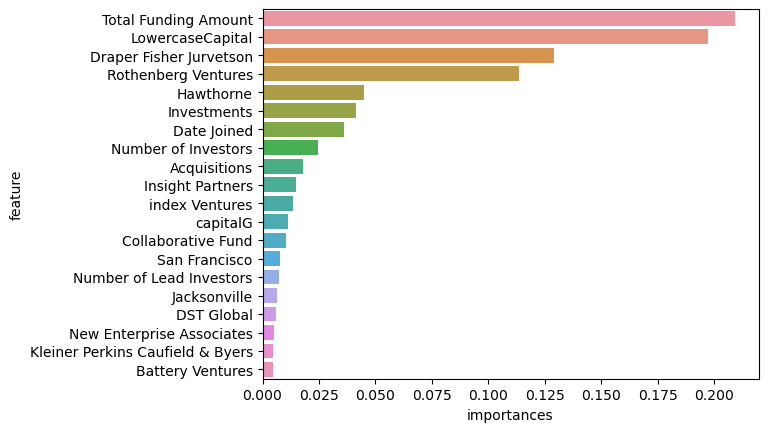

<Figure size 20000x30000 with 0 Axes>

In [140]:
sns.barplot(forest_importances["importances"][0:20],forest_importances["feature"][0:20])
plt.figure(figsize=[200,300])

In [141]:
import shap

In [142]:
explainer = shap.Explainer(rf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test,max_evals=600)

Permutation explainer: 267it [03:26,  1.22it/s]                                                                        


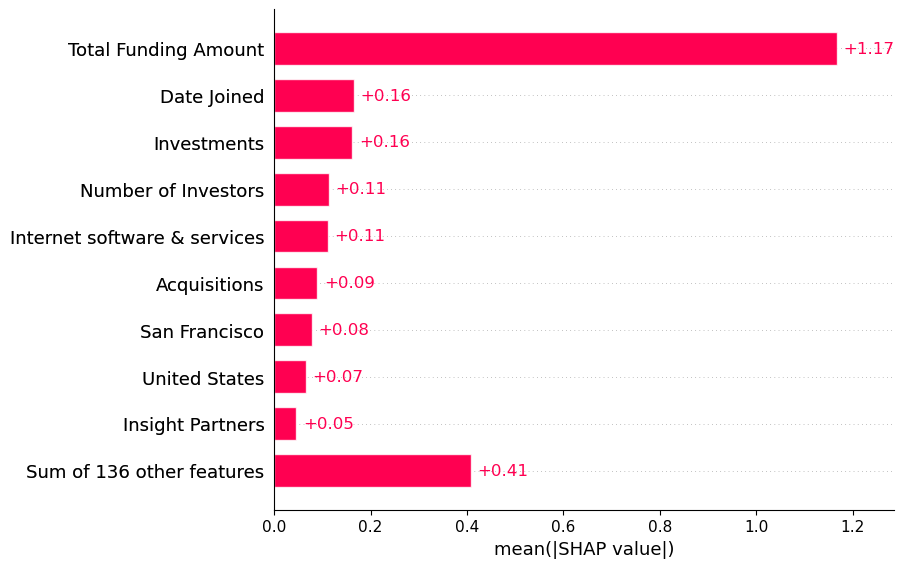

In [144]:
shap.plots.bar(shap_values)

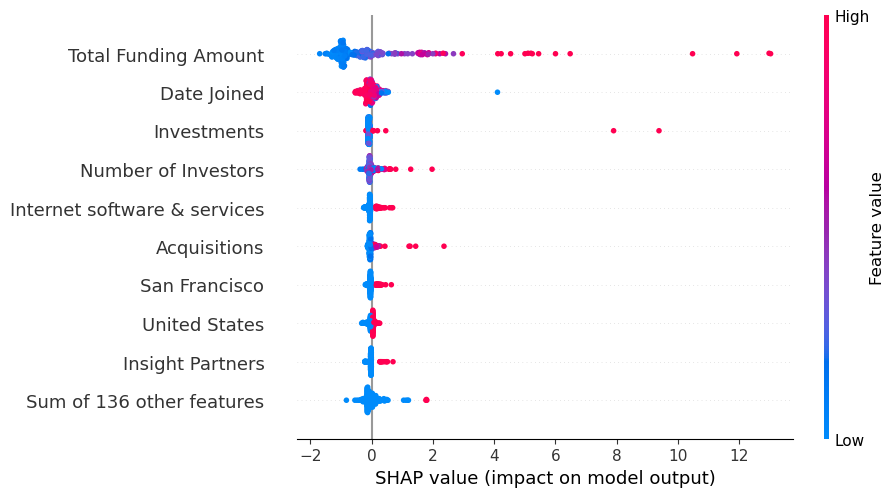

In [145]:
shap.plots.beeswarm(shap_values)

In [146]:
X_test.columns[0:100]

Index(['Acquisitions', 'Exits', 'Investments', 'Total Funding Amount',
       'Number of Lead Investors', 'Number of Investors', 'Date Joined',
       'education', 'China', 'France', 'Germany', 'India', 'Indonesia',
       'Seychelles', 'United States', 'Artificial intelligence',
       'Auto & transportation', 'Consumer & retail', 'Cybersecurity',
       'Data management & analytics', 'E-commerce & direct-to-consumer',
       'Edtech', 'Fintech', 'Hardware', 'Health',
       'Internet software & services', 'Mobile & telecommunications', 'Other',
       'Supply chain, logistics, & delivery', 'Travel', 'Amsterdam',
       'Bengaluru', 'Berlin', 'Cary', 'Chicago', 'Hawthorne', 'Jacksonville',
       'Jakarta', 'Luohe', 'Munich', 'Netanya', 'New York', 'Roseville',
       'San Diego', 'San Francisco', 'San Mateo', 'Santa Monica', 'Shenzhen',
       'Victoria', 'Waltham', '01 Advisors', '10T Fund', 'Accel',
       'Accel India', 'Accel Partners', 'American Express Ventures',
       'Andree

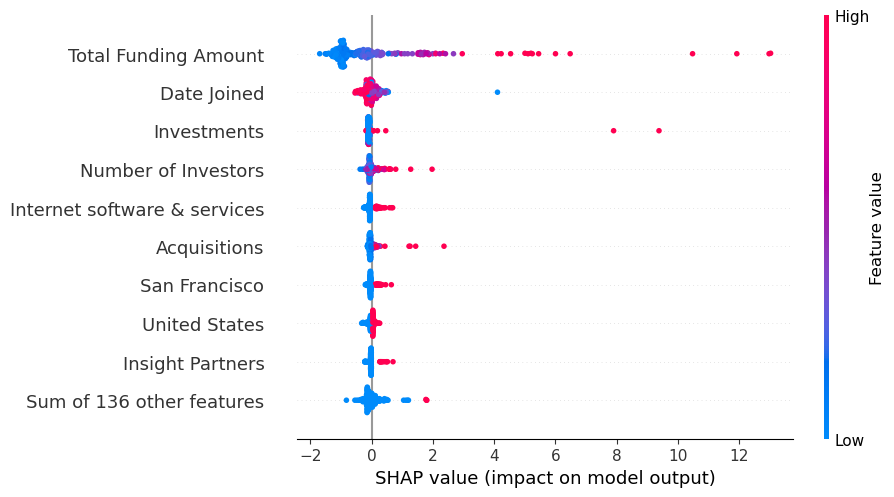

In [150]:
shap.plots.beeswarm(shap_values)

In [152]:
shap_values.shape

(266, 145)

In [157]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Choose a specific test instance to explain
test_instance = X_test.iloc[0]

# Calculate the SHAP values for the chosen test instance
shap_values_instance = explainer.shap_values(test_instance)

# Print the contribution of each feature for the chosen test instance
for i in range(len(X_test.columns)):
    print(f"{X_test.columns[i]}: {shap_values_instance[0][i]}")

IndexError: invalid index to scalar variable.

In [156]:
X_test.iloc[0]

Acquisitions                        2.0
Exits                               0.0
Investments                         0.0
Total Funding Amount        111100000.0
Number of Lead Investors            4.0
                               ...     
Warbug Pincus                       0.0
Y Combinator                        0.0
Yunfeng Capital                     0.0
capitalG                            0.0
index Ventures                      0.0
Name: 732, Length: 145, dtype: float64

### Deep Learning Model

In [30]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv1D,Flatten,MaxPooling1D
from sklearn.metrics import r2_score

In [31]:
X_train.shape[1]

1597

In [35]:
model = Sequential()

model.add(Conv1D(filters=100, kernel_size=3, activation='relu', input_shape=(1597, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1595, 100)         400       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 797, 100)         0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 79700)             0         
                                                                 
 dense_2 (Dense)             (None, 1000)              79701000  
                                                                 
 dense_3 (Dense)             (None, 50)                50050     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                      

In [36]:
model.compile(loss='mse', optimizer='adam', metrics =["mse"])

# Train the model
model.fit(X_train.to_numpy().reshape(-1, 1597, 1), y_train, epochs=20, batch_size=20)

# Predict using the model and calculate the r-squared value
y_pred = model.predict(X_test.to_numpy().reshape(-1, 1597, 1))
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Epoch 1/20
43/43 [==============================] - 15s 337ms/step - loss: 805140944650240.0000 - mse: 805140944650240.0000
Epoch 2/20
43/43 [==============================] - 12s 287ms/step - loss: 2060306219008.0000 - mse: 2060306219008.0000
Epoch 3/20
43/43 [==============================] - 12s 271ms/step - loss: 197494128640.0000 - mse: 197494128640.0000
Epoch 4/20
43/43 [==============================] - 12s 282ms/step - loss: 7509068742656.0000 - mse: 7509068742656.0000
Epoch 5/20
43/43 [==============================] - 12s 281ms/step - loss: 14333392191488.0000 - mse: 14333392191488.0000
Epoch 6/20
43/43 [==============================] - 12s 269ms/step - loss: 8691374882816.0000 - mse: 8691374882816.0000
Epoch 7/20
43/43 [==============================] - 13s 293ms/step - loss: 32893350969344.0000 - mse: 32893353066496.0000
Epoch 8/20
43/43 [==============================] - 12s 279ms/step - loss: 38612150255616.0000 - mse: 38612150255616.0000
Epoch 9/20
43/43 [==============

In [37]:
# it seem to us that deep learning models may not be the best approach, so we will go with random forest.